In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is A0E8-ECE8

 Directory of C:\Users\saims\OneDrive\Desktop\CSE476-Machine-Learning-Lab

15-Jun-23  06:18 PM    <DIR>          .
15-Jun-23  06:18 PM    <DIR>          ..
15-Jun-23  05:09 PM    <DIR>          .ipynb_checkpoints
14-Jun-23  12:52 PM            15,464 00_LabelEncoder, OrdianlEncoder, OneHotEncoder.ipynb
14-Jun-23  06:24 AM            51,679 01_Logistic Regression.ipynb
14-Jun-23  01:04 AM            69,780 02_Support Vector Machine.ipynb
14-Jun-23  01:20 AM            91,769 03_Decision Tree.ipynb
14-Jun-23  06:35 AM           244,277 04_Random Forest.ipynb
14-Jun-23  07:26 PM            60,482 05_K Nearest Neighbour.ipynb
14-Jun-23  05:45 PM           120,675 06_Confusion Matrix, Accuracy, Recall, Precision, F1, FPR, TPR, ROC.ipynb
15-Jun-23  04:40 PM           773,641 07_Sentiment Analysis (IMDB Dataset).ipynb
15-Jun-23  06:18 PM           230,512 08_Linear Regression.ipynb
15-Jun-23  09:21 AM               766 09_K 

In [4]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# eda

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [8]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [9]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [10]:
df.hotwaterheating.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.airconditioning.unique()

array(['yes', 'no'], dtype=object)

In [12]:
df.prefarea.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['guestroom'] = le.fit_transform(df.guestroom)

In [16]:
df['mainroad'] = le.fit_transform(df.mainroad)

In [17]:
df['basement'] = le.fit_transform(df.basement)

In [18]:
df['hotwaterheating'] = le.fit_transform(df.hotwaterheating)

In [19]:
df['airconditioning'] = le.fit_transform(df.airconditioning)

In [20]:
df['prefarea'] = le.fit_transform(df.prefarea)

In [21]:
df['furnishingstatus'] = le.fit_transform(df.furnishingstatus)

In [22]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [23]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [24]:
corr = df.corr()

In [25]:
import seaborn as sns

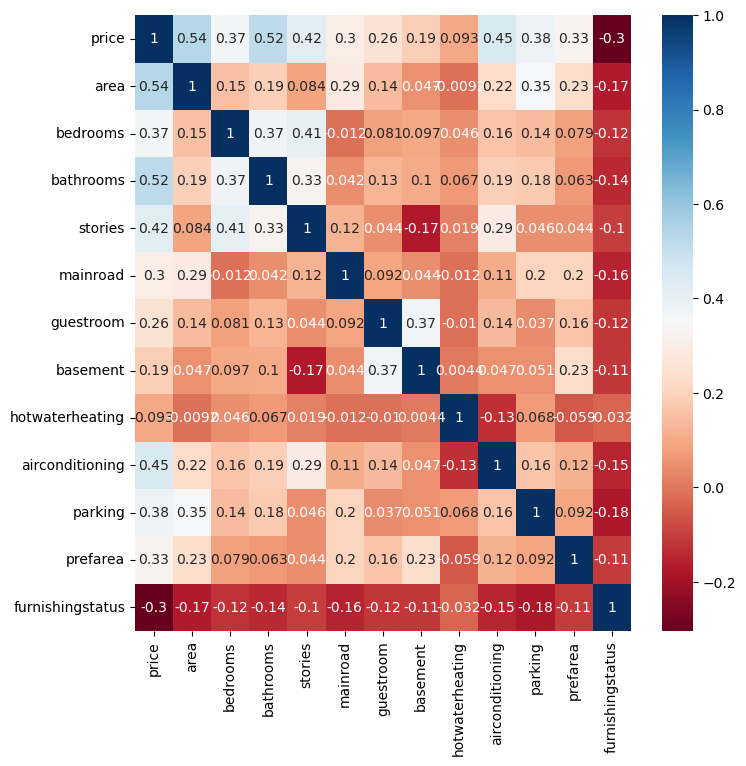

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

In [27]:
# we will take only the strongly correlated features for linear regression

# plt.plot(df.price,df.furnishingstatus)

X = df.drop(['price'], axis=1)
y = df.price

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=81)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.score(X_test, y_test)

0.6653431800555532

In [32]:
(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12) = model.coef_

In [33]:
m1

258.52950130836166

In [34]:
c = model.intercept_

In [35]:
X.loc[[0]].shape

(1, 12)

In [36]:
model.predict(X.loc[[0]])

array([7970605.6886658])

In [37]:
X.loc[[0]]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0


In [38]:
X.loc[[0]].values

array([[7420,    4,    2,    3,    1,    0,    0,    0,    1,    2,    1,
           0]], dtype=int64)

In [39]:
[[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12]] = X.loc[[0]].values

In [40]:
y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + m7*x7 + m8*x8 + m9*x9 + m10*x10 + m11*x11 + m12*x12 + c

In [41]:
y

7970605.688665804